In [173]:
import sklearn

In [174]:
import pandas as pd

In [175]:
data.columns

Index(['country', 'year', 'Happiness Score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality',
       'Standard deviation of happiness score by country-year',
       'Standard deviation/Mean of happiness score by country-year',
       'gini of household income reported in Gallup, by wp5-year',
       'GDP per capita'],
      dtype='object')

In [176]:
data = pd.read_csv('../input/cleaned_data.csv')
data = data.drop(columns=['GINI index (World Bank estimate), average 2000-15'])

In [184]:
import math
data = data.dropna()
gdplog = data['Log GDP per capita'] 
gdp = gdplog.apply(math.exp)
data['GDP per capita'] = gdp
X = data.drop(columns=['Happiness Score','country', 'year','Log GDP per capita','Standard deviation of happiness score by country-year',
       'Standard deviation/Mean of happiness score by country-year', 'gini of household income reported in Gallup, by wp5-year'])

In [185]:
print(data.columns)
print(X.columns)

Index(['country', 'year', 'Happiness Score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality',
       'Standard deviation of happiness score by country-year',
       'Standard deviation/Mean of happiness score by country-year',
       'gini of household income reported in Gallup, by wp5-year',
       'GDP per capita'],
      dtype='object')
Index(['Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'GDP per capita'],
      dtype='object')


In [186]:
y = data['Happiness Score']

In [187]:
from sklearn import preprocessing
from scipy import stats 
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from scipy import stats

X_scaled = preprocessing.scale(X)
X_2 = sm.add_constant(X_scaled)

reg = Lasso(alpha=0.05).fit(X_scaled, y)
for idx, name in zip(range(15),X.columns):
    print(name, ":", reg.coef_[idx])
print("intercept:",reg.intercept_)

est = sm.OLS(y, X_2)
est2 = est.fit()
print(X.columns)
print(est2.summary())




Social support : 0.24675632381883103
Healthy life expectancy at birth : 0.3416826105226218
Freedom to make life choices : 0.044107327588166406
Generosity : 0.0
Perceptions of corruption : -0.026227548042754022
Positive affect : 0.23246634744650171
Negative affect : -0.0
Confidence in national government : -0.014808686938007456
Democratic Quality : 0.0
Delivery Quality : 0.10353936460556376
GDP per capita : 0.19713616607666337
intercept: 5.431165826839666
Index(['Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'GDP per capita'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:      

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

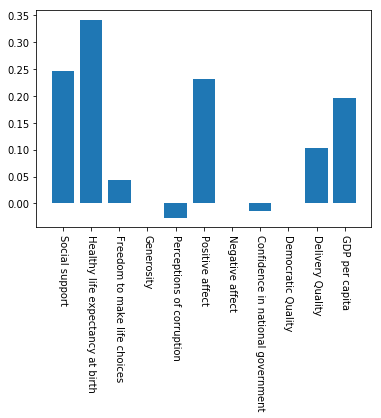

In [188]:
import matplotlib.pyplot as plt
plt.bar(x=X.columns,height=reg.coef_)
plt.xticks(rotation=-90)


In [163]:
print(X.columns)

Index(['Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality',
       'Standard deviation of happiness score by country-year',
       'Standard deviation/Mean of happiness score by country-year',
       'gini of household income reported in Gallup, by wp5-year',
       'GDP per capita'],
      dtype='object')
